In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('bank-additional-full.csv', sep =';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#for observation age and y (client subscribed a term deposit)
df['y'].describe

<bound method NDFrame.describe of 0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object>

In [7]:
#replace the binary strings to 1 and 0
df.y.replace(('yes', 'no'), (1, 0), inplace=True)
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [8]:
#replace the binary strings to 1 and 0
df.education.replace(('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'),
                     (1, 2, 3, 4, 5, 6, 7, 0 ),
                     inplace=True)
df.dtypes

age                 int64
job                object
marital            object
education           int64
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [9]:
#generate train and test data frame
train = df.drop(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1)

test = train

<Axes: xlabel='y', ylabel='Count'>

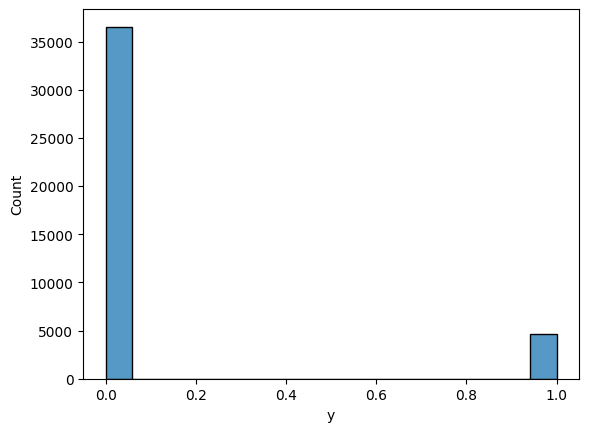

In [10]:
#generate a hists to analyse this relation
import seaborn as sns
sns.histplot(data = df, x='y')


<Axes: xlabel='education', ylabel='Count'>

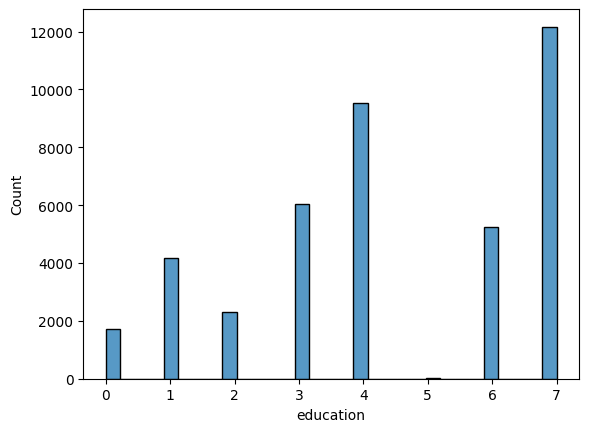

In [11]:
sns.histplot(data = df, x='education')

In [12]:
#train data
X_train = train.drop('y', axis=1)
y_train = train.y

#test data
X_test = test.drop('y', axis=1)
y_test = test.y

In [13]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

model_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

model_dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

model_rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

model_xg = XGBClassifier(random_state=0).fit(X_train, y_train)


In [14]:
#creating predicts on tests data
test['y_lr'] = model_lr.predict(X_train)
test['y_dt'] = model_dt.predict(X_train)
test['y_rf'] = model_rf.predict(X_train)
test['y_xg'] = model_xg.predict(X_train)

test.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_lr,y_dt,y_rf,y_xg
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0
1,57,4,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0
2,37,4,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0
3,40,2,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0
4,56,4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0


In [15]:
#valuing the models by matrix_confusion; accuracy

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
confusion_matrix(test.y, test.y_lr)


array([[35628,   920],
       [ 2838,  1802]])

In [17]:
confusion_matrix(test.y, test.y_dt)

array([[36548,     0],
       [    3,  4637]])

In [18]:
confusion_matrix(test.y, test.y_rf)

array([[36545,     3],
       [    2,  4638]])

In [19]:
confusion_matrix(test.y, test.y_xg)

array([[35865,   683],
       [ 1409,  3231]])

In [20]:
ac_lr = accuracy_score(test.y, test.y_lr)
ac_dt = accuracy_score(test.y, test.y_dt)
ac_rf = accuracy_score(test.y, test.y_rf)
ac_xg = accuracy_score(test.y, test.y_xg)

print('Linear Regression accuracy:', ac_lr)
print('Linear Decision Tree accuracy:', ac_dt)
print('Random Forest accuracy:', ac_rf)
print('XGBoost accuracy:', ac_xg)

Linear Regression accuracy: 0.9087598329610567
Linear Decision Tree accuracy: 0.9999271632514325
Random Forest accuracy: 0.999878605419054
XGBoost accuracy: 0.9492085073322327


In [21]:
rc_lr = precision_score(test.y, test.y_lr)
rc_dt = precision_score(test.y, test.y_dt)
rc_rf = precision_score(test.y, test.y_rf)
rc_xg = precision_score(test.y, test.y_xg)

print('Linear Regression Precision Score:', rc_lr)
print('Linear Decision Tree Precision Score:', rc_dt)
print('Random Forest Precision Score:', rc_rf)
print('XGBoost Precision Score:', rc_xg)

Linear Regression Precision Score: 0.6620132255694342
Linear Decision Tree Precision Score: 1.0
Random Forest Precision Score: 0.9993535875888817
XGBoost Precision Score: 0.8254982115482882


In [22]:
#We can conclude the best model for this data, analysing only the numbers, is the Decision Tree model


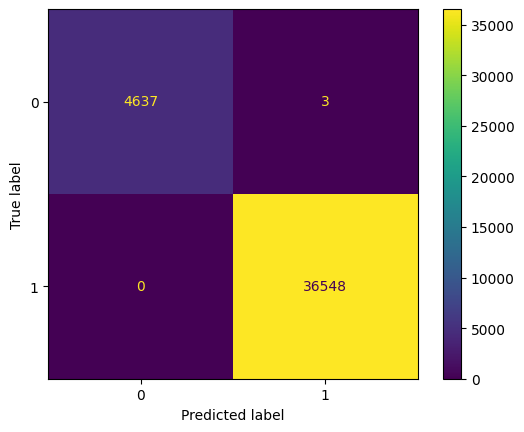

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test.y, test.y_dt, labels=[1,0]),
                       display_labels=model_dt.classes_).plot()
plt.grid(False)
plt.show()

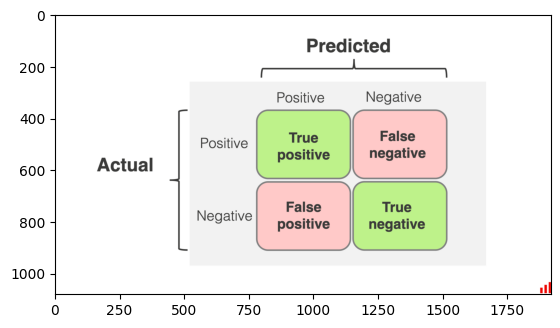

In [25]:
import matplotlib.image as mpimg

img = mpimg.imread("/content/644aea65cefe35380f198a5a_class_guide_cm08.png")
imgplot = plt.imshow(img)
plt.show()

The **Decision Tree model** produced results that rectified all false positives, ensuring that individuals entitled to credit received it. However, it failed to identify certain cases of potential future default (*false negatives*), granting credit to individuals who should not have been eligible. Specifically, the model incorrectly flagged 3 individuals as creditworthy.

Despite these isolated issues, a comprehensive evaluation of the model indicates its overall high performance. The model demonstrated an impressive accuracy rate of **99.99%**. It is important to note that the desired effectiveness of the model may vary based on the company's requirements. For instance, if the model is mandated to achieve an effectiveness level exceeding 90%, **all analyzed models met this criterion**.
